In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_dummy = pd.read_csv('dataset/complete_storage.csv')
df_dummy.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df_dummy.head()

,zip,area,market,state,city,lat,lng,population,density,county,mean_income,mean_rent,change_in_emprate,market_latitude,market_longitude,city_coord,market_coord,distance
0,1020,72605.0,worcester - springfield,MA,chicopee,42.17637,-72.56537,30097.0,914.6,hampden,63987.5,988.500000,0.846922,52.198987,-2.22679,"42.17637,-72.56537","52.19898715,-2.226790451746398",5211.158966
1,1129,89250.0,worcester - springfield,MA,springfield,42.12099,-72.48774,6762.0,790.8,hampden,63987.5,988.500000,0.846922,52.198987,-2.22679,"42.12099,-72.48774","52.19898715,-2.226790451746398",5209.873012
2,1301,49500.0,worcester - springfield,MA,greenfield,42.62406,-72.60401,17713.0,268.1,franklin,61561.0,904.000000,1.197479,52.198987,-2.22679,"42.62406,-72.60401","52.19898715,-2.226790451746398",5183.316359
3,1453,71840.0,worcester - springfield,MA,leominster,42.51863,-71.76138,41579.0,554.3,worcester,55125.0,917.666667,0.582158,52.198987,-2.22679,"42.51863,-71.76138","52.19898715,-2.226790451746398",5135.625875
4,1501,159485.0,worcester - springfield,MA,auburn,42.19720,-71.84534,16549.0,401.4,worcester,77291.0,1063.000000,0.582158,52.198987,-2.22679,"42.1972,-71.84534000000002","52.19898715,-2.226790451746398",5162.814015


In [4]:
df_dummy.shape

(2719, 18)

In [5]:
df_dummy.isnull().sum()

zip                  0
area                 0
market               0
state                0
city                 0
lat                  0
lng                  0
population           0
density              0
county               0
mean_income          0
mean_rent            0
change_in_emprate    0
market_latitude      0
market_longitude     0
city_coord           0
market_coord         0
distance             0
dtype: int64

In [6]:
df_dummy.duplicated().sum()

0

In [7]:
df = df_dummy[['market','state','county','city','zip','area','population','mean_income','mean_rent','change_in_emprate','density']]
df.rename(columns={'area':'storage_area'}, inplace=True)
df.head()

,market,state,county,city,zip,storage_area,population,mean_income,mean_rent,change_in_emprate,density
0,worcester - springfield,MA,hampden,chicopee,1020,72605.0,30097.0,63987.5,988.500000,0.846922,914.6
1,worcester - springfield,MA,hampden,springfield,1129,89250.0,6762.0,63987.5,988.500000,0.846922,790.8
2,worcester - springfield,MA,franklin,greenfield,1301,49500.0,17713.0,61561.0,904.000000,1.197479,268.1
3,worcester - springfield,MA,worcester,leominster,1453,71840.0,41579.0,55125.0,917.666667,0.582158,554.3
4,worcester - springfield,MA,worcester,auburn,1501,159485.0,16549.0,77291.0,1063.000000,0.582158,401.4


<AxesSubplot:xlabel='change_in_emprate', ylabel='storage_area'>

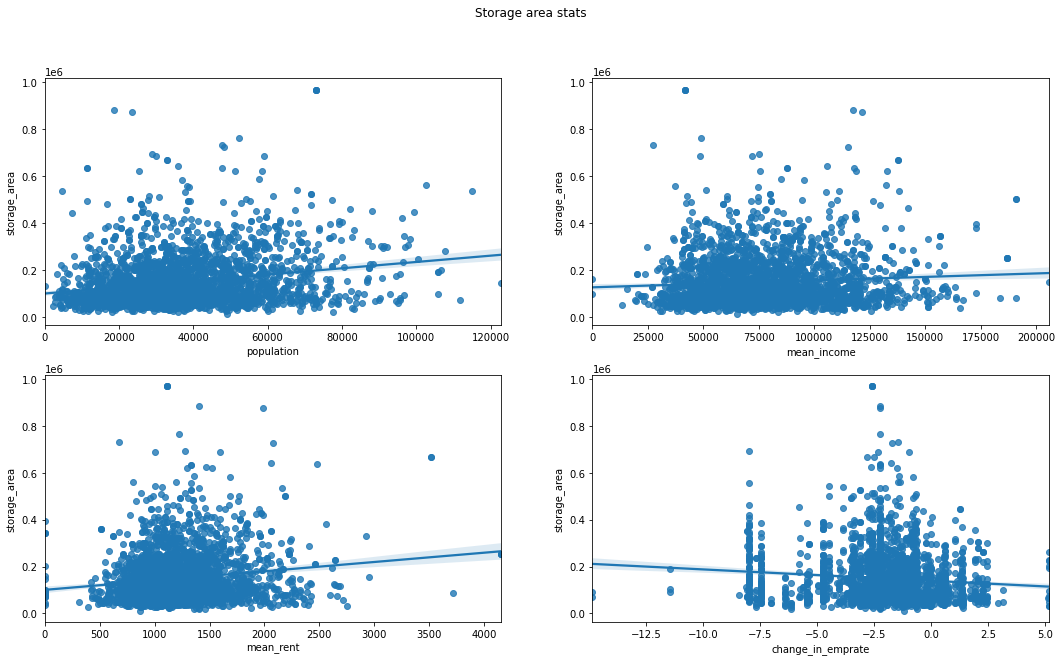

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Storage area stats')

sns.regplot(ax=axes[0, 0], data=df, y='storage_area', x='population')
sns.regplot(ax=axes[0, 1], data=df, y='storage_area', x='mean_income')
sns.regplot(ax=axes[1, 0], data=df, y='storage_area', x='mean_rent')
sns.regplot(ax=axes[1, 1], data=df, y='storage_area', x='change_in_emprate')
#sns.regplot(ax=axes[1, 1], data=df, y='storage_area', x='density')

In [9]:
df.describe()

,zip,storage_area,population,mean_income,mean_rent,change_in_emprate,density
count,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000
mean,52125.094888,149219.545053,36705.458344,77445.793532,1228.696078,-2.027464,1764.177644
std,30662.472854,110809.382972,17979.425640,27619.365758,406.404990,2.199290,2570.508186
min,1020.000000,12000.000000,0.000000,0.000000,0.000000,-14.867547,2.100000
25%,27608.500000,73940.000000,23971.000000,57806.785714,966.066667,-2.654993,638.900000
50%,48104.000000,112375.000000,33965.000000,73376.000000,1175.000000,-2.027464,1173.800000
75%,80214.000000,195246.000000,47256.000000,93381.583333,1417.800000,-0.780992,1929.800000
max,98685.000000,968999.000000,122814.000000,205835.000000,4153.000000,5.187486,50118.800000


In [10]:
#checking count of data types
df.dtypes.value_counts()

float64    6
object     4
int64      1
dtype: int64

In [11]:
#sampling 10 rows
df.sample(10)

,market,state,county,city,zip,storage_area,population,mean_income,mean_rent,change_in_emprate,density
873,north central florida,FL,flagler,palm coast,32164,54160.0,45207.0,30351.500000,510.500000,-1.675575,482.5
1805,dallas - north,TX,dallas,dallas,75244,115356.0,13701.0,148902.000000,2390.000000,-0.675607,1110.9
785,atlanta - suburban,GA,walton,loganville,30052,79596.0,65959.0,51882.000000,935.666667,-3.913073,262.4
2106,phoenix,AZ,maricopa,phoenix,85044,89262.0,41449.0,50552.500000,1062.500000,0.598365,1017.9
1951,san antonio,TX,bexar,san antonio,78201,87210.0,46775.0,60727.333333,835.100000,-1.996224,2461.5
381,philadelphia - suburban,PA,bucks,morrisville,19067,87560.0,51590.0,128020.000000,1180.000000,-1.498237,695.3
490,baltimore,MD,harford,bel air,21015,97310.0,29192.0,71112.000000,1276.000000,-0.148810,346.6
2379,san diego,CA,san diego,san diego,92114,69100.0,70039.0,80540.200000,1487.200000,-2.225852,3066.7
794,atlanta - suburban,GA,gwinnett,norcross,30071,202310.0,25218.0,59908.000000,666.666667,-4.462129,743.4
857,atlanta - suburban,GA,gwinnett,buford,30519,290947.0,46415.0,82304.000000,1087.000000,-4.462129,448.1


In [12]:
### Visual EDA

In [13]:
#### Response Variable

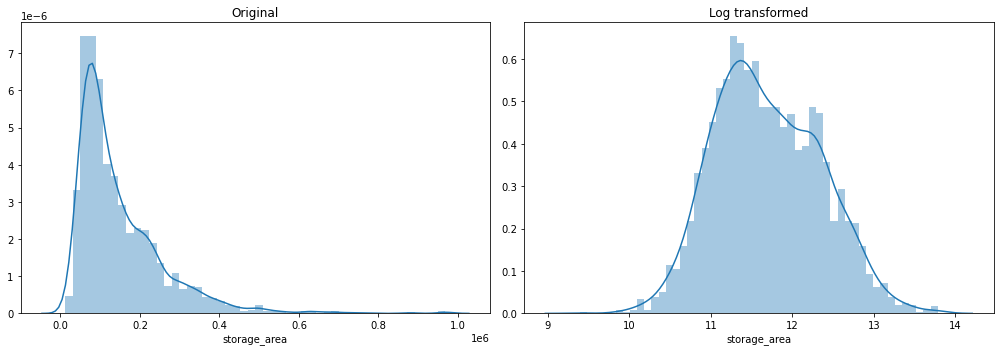

In [14]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(df.storage_area, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(df.storage_area), bins=50)
plt.title('Log transformed')

plt.tight_layout()

Text(0, 0.5, 'Sample quantiles')

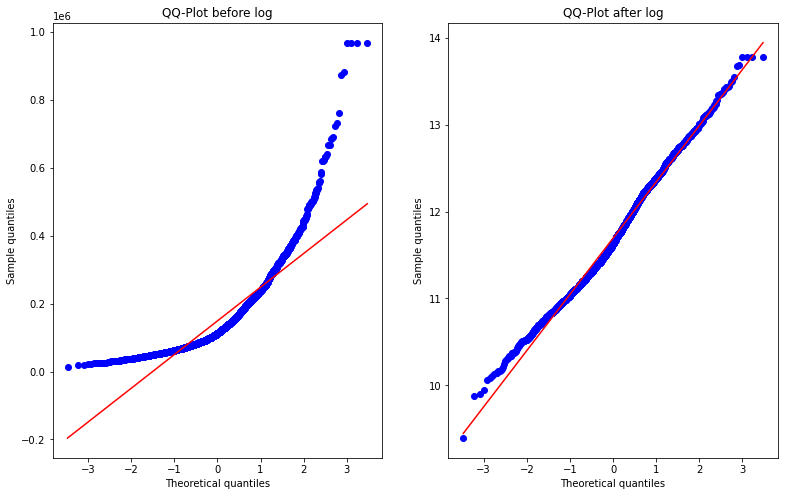

In [16]:
##QQ-Plot before log-transformation
fig = plt.figure(figsize=(13, 8))

ax1 = plt.subplot(121)
res = stats.probplot(df['storage_area'], plot=plt)
plt.title('QQ-Plot before log')
plt.ylabel('Sample quantiles')

ax1 = plt.subplot(122)
a = np.log1p(df["storage_area"])
res = stats.probplot(a, plot=plt)
plt.title('QQ-Plot after log')
plt.ylabel('Sample quantiles')

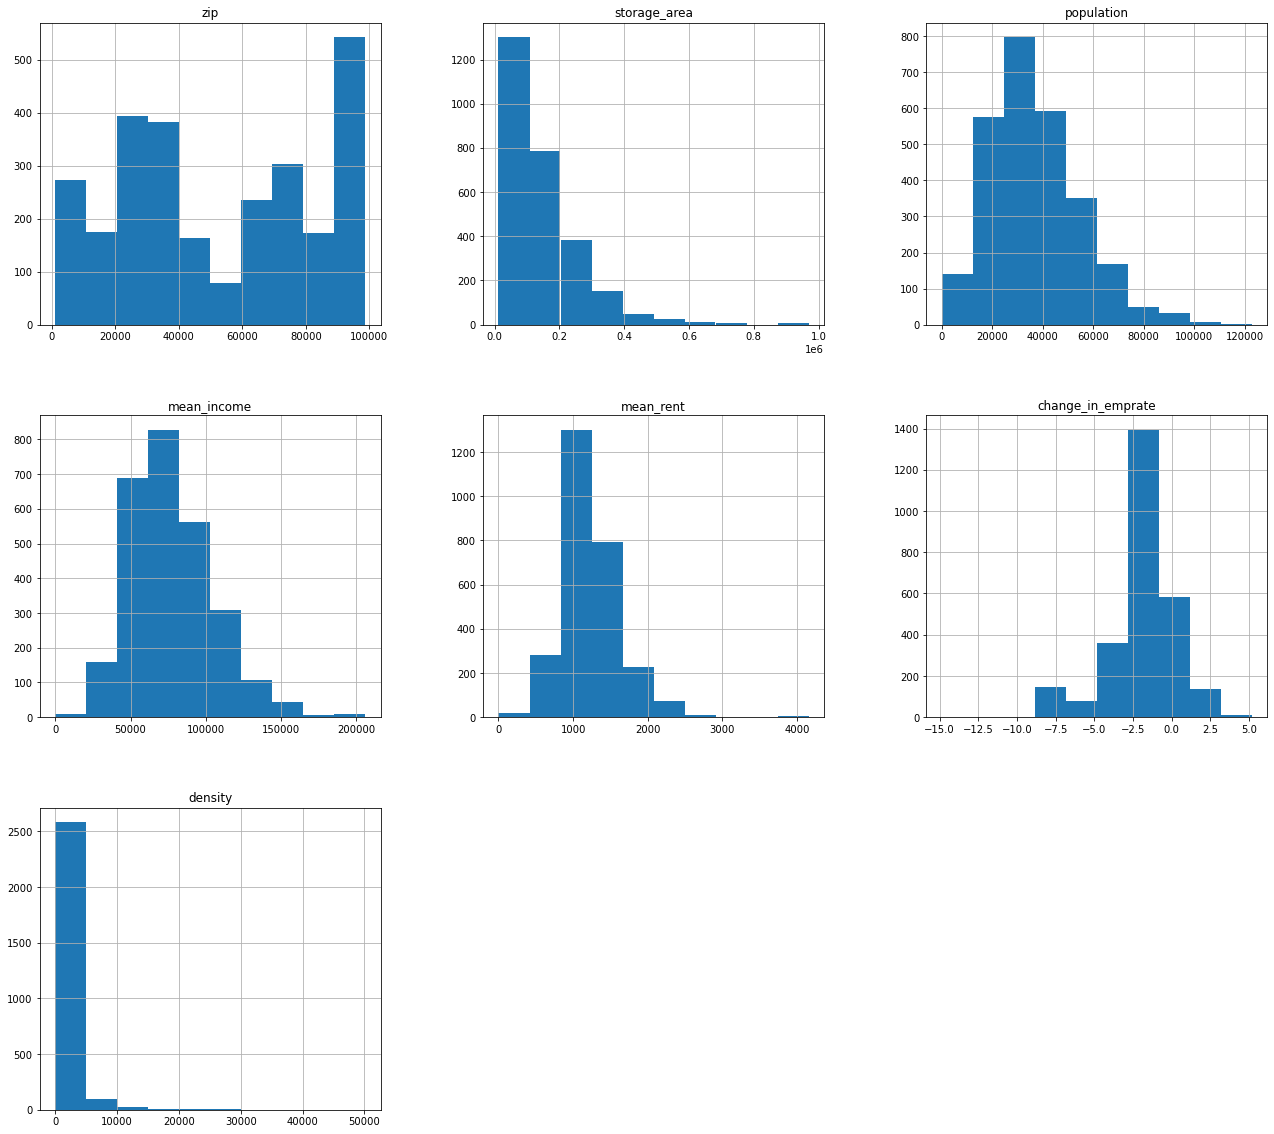

In [17]:
hist_overview = df.hist(figsize=(22,20))

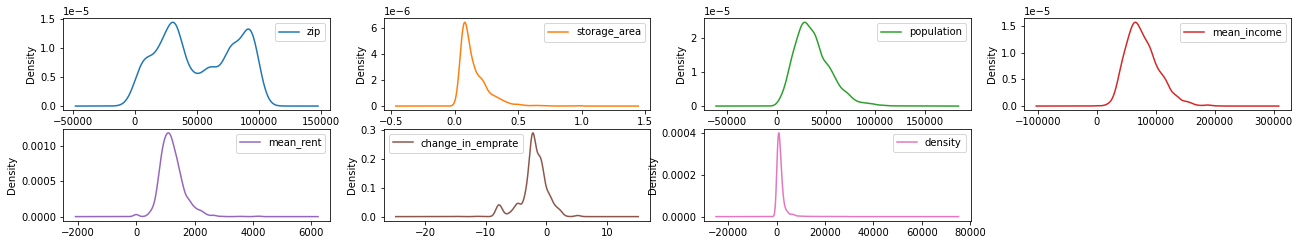

In [18]:
#Density plots
den_overview = df.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

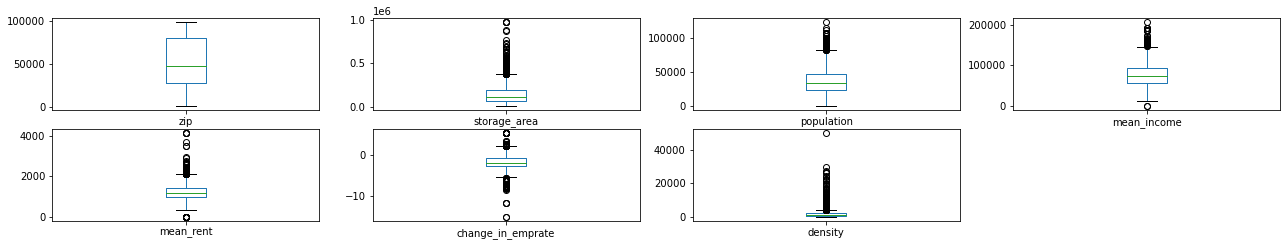

In [19]:
#Boxplots
box_overview = df.plot(kind='box', subplots=True, layout=(10,4), sharex=False, sharey=False, figsize=(22,20))

Text(0.5, 1.0, 'Storage area vs. State')

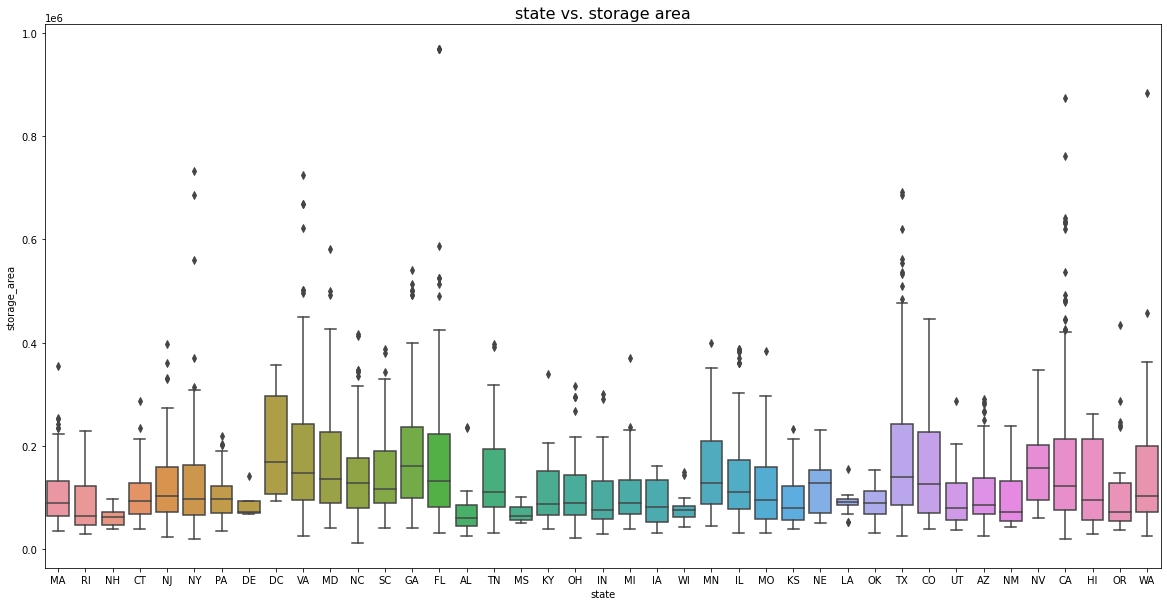

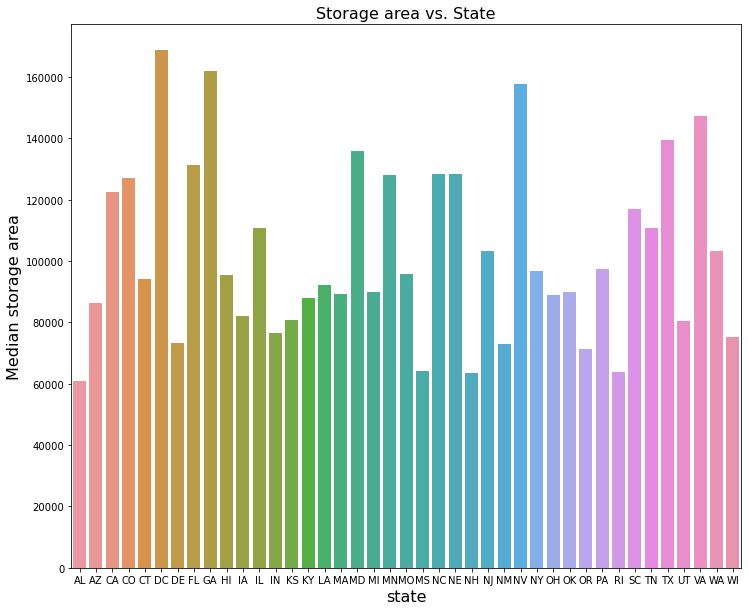

In [22]:
#income vs. storage area
df['logstorage_area'] = np.log(df['storage_area'])

plt.figure(figsize = (20, 10))
plt.title('state vs. storage area', size=16)
ax = sns.boxplot(x='state', y='storage_area', data=df)

#Overall state vs. Median storage area
quality = df.groupby('state')['storage_area'].agg('median').reset_index()
plt.figure(figsize=(12,10))
sns.barplot(quality['state'], quality['storage_area'])
plt.xlabel('state', size=16)
plt.ylabel('Median storage area', size=16)
plt.title('Storage area vs. State', size=16)

In [ ]:
#Relationship between above income and storage area
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=df['mean_income'], y=df['logstorage_area'])
plt.ylabel('Log(Storage area)', size=16)
plt.xlabel('Mean Income',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

In [26]:
df.groupby('state').mean_income

In [28]:
df_test = df.set_index(['state'])
grouped = df_test.groupby(level=df_test.index.names.difference(['mean_income']))
grouped.sum()

,zip,storage_area,population,mean_income,mean_rent,change_in_emprate,density,logstorage_area
state,,,,,,,,
AL,644383,1428339.0,4.931590e+05,1.121392e+06,17760.905602,-130.983464,10673.600000,199.510580
AZ,6312162,8246237.0,2.988227e+06,4.951748e+06,87240.820767,58.532440,98735.500000,848.964404
CA,37755227,67321415.0,1.824442e+07,3.283721e+07,608880.191306,-905.921660,965383.900000,4791.115072
CO,5298424,10536501.0,2.321877e+06,5.104638e+06,79418.677811,129.226120,100361.900000,777.807346
CT,243540,4173637.0,1.025589e+06,3.565856e+06,50489.432028,-89.202987,30669.300000,436.565443
DC,100042,1023945.0,2.373700e+05,4.259380e+05,6886.757143,-10.137318,30232.400000,60.465220
DE,78952,355387.0,1.839880e+05,2.695227e+05,4812.702381,-8.109854,3259.100000,45.379464
FL,9798108,51051839.0,1.055562e+07,1.843123e+07,348326.553870,-918.247443,445157.000000,3479.449735
GA,3145646,19364575.0,4.393719e+06,7.859661e+06,118317.313863,-371.687140,91210.800000,1244.483968


No handles with labels found to put in legend.


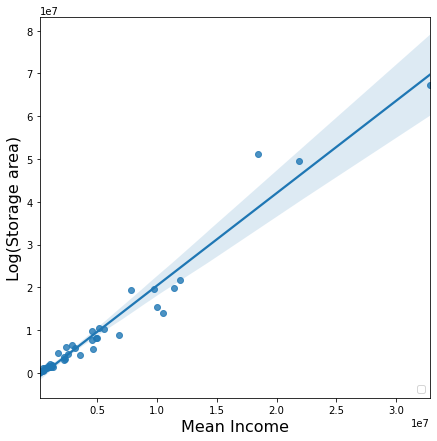

In [37]:
#grouped['logsa'] = np.log(grouped['storage_area'].sum())

#Relationship between above income and storage area
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=grouped['mean_income'].sum(), y=grouped['storage_area'].sum())
plt.ylabel('Log(Storage area)', size=16)
plt.xlabel('Mean Income',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

No handles with labels found to put in legend.


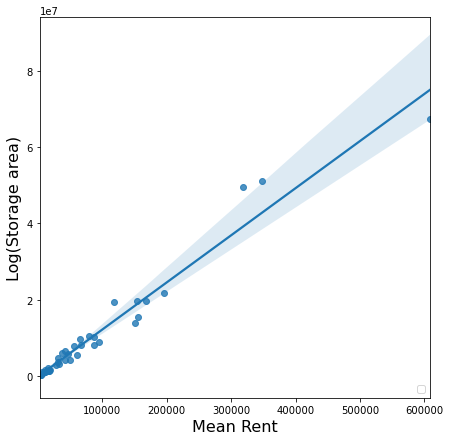

In [41]:
#Relationship between above Rent and storage area
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=grouped['mean_rent'].sum(), y=grouped['storage_area'].sum())
plt.ylabel('Log(Storage area)', size=16)
plt.xlabel('Mean Rent',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

No handles with labels found to put in legend.


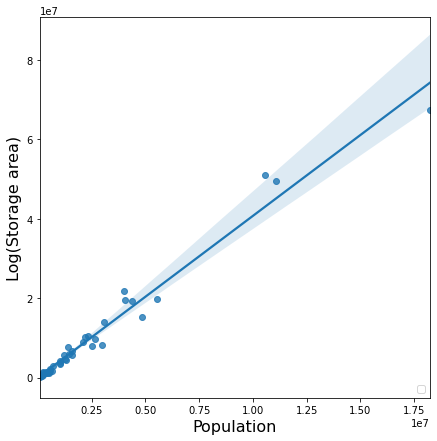

In [42]:
#Relationship between above income and storage area
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=grouped['population'].sum(), y=grouped['storage_area'].sum())
plt.ylabel('Log(Storage area)', size=16)
plt.xlabel('Population',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

No handles with labels found to put in legend.


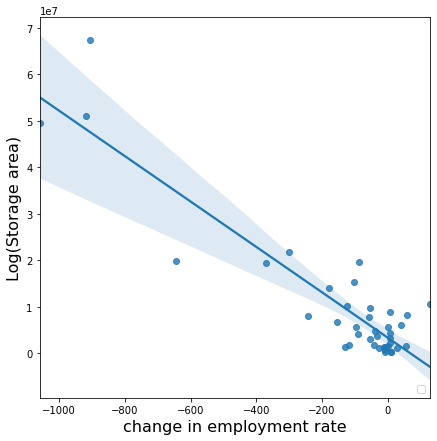

In [43]:
#Relationship between above change in employment rate and storage area
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=grouped['change_in_emprate'].sum(), y=grouped['storage_area'].sum())
plt.ylabel('Log(Storage area)', size=16)
plt.xlabel('change in employment rate',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

<AxesSubplot:>

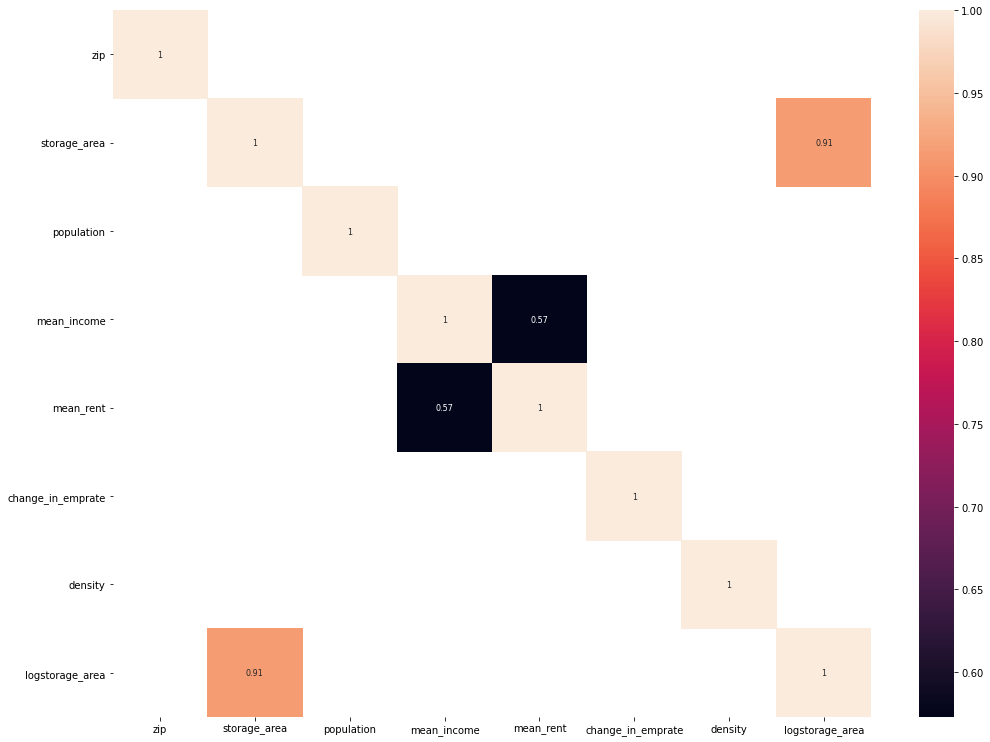

In [45]:
#Correlation heatmap
correlation = df.corr(method='pearson')
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.4) | (correlation < -0.4)],  annot=True, annot_kws={"size": 8})

In [47]:
##skewness
skew_ = pd.DataFrame(df.skew(), columns=["skew"])
ordered_skew = skew_[(skew_>1) | (skew_<-1)].dropna().sort_values(by='skew',ascending=False)
ordered_skew['feature'] = ordered_skew.index

In [48]:
df.skew()

zip                  0.031192
storage_area         2.263987
population           0.859692
mean_income          0.746989
mean_rent            1.293761
change_in_emprate   -0.840397
density              6.861377
logstorage_area      0.234145
dtype: float64